# Project: Statistics information about customer reservations

## Table of Contents
<ul>
<li><a href="#Introduction">Introduction</a></li>
<li><a href="#DataWrangling">Data Wrangling</a></li>
<li><a href="#ExploratoryDataAnalysis">Exploratory Data Analysis</a></li>
<li><a href="#Conclusions">Conclusions</a></li>
</ul>

## Introduction
The work contains several stages that the data goes through to facilitate dealing with it and benefit from it in solving problems and answering the most important questions. In this work, data about Hotel booking were used in the first stage.

The data was read from a CSV file that contains 10000 rows and 30 columns.

In the second stage, some columns that contained a large lack of information were deleted and were not helpful in the solution. 

In the third stage, the data was used after processing to answer three main questions and represent them graphically in order to facilitate understanding of the results. 
###### Throughout this work, we are tring to answer this question by exploring the data set and also the connections among variables:
###### and we will answer: 
1- What type of customer is the most? Is it Transient or Contract or ...?

2- How many reservations are from USA?

3- What year has the most reservations?

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

<a id='DataWrangling'></a>
## Data Wrangling
### General Properties : Read dataset from CSV file

In [2]:
dataset = pd.read_csv('hotel_bookings.csv')
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [3]:
## we want to know the count of columns and index
dataset.shape

(9999, 32)

In [4]:
## we want to check if we have a null values or not
pd.isna(dataset).sum()

hotel                                0
is_canceled                          0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
adults                               0
children                             0
babies                               0
meal                                 0
country                              8
market_segment                       0
distribution_channel                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
reserved_room_type                   0
assigned_room_type                   0
booking_changes                      0
deposit_type                         0
agent                             1529
company                           9444
days_in_waiting_list     

In [5]:
## we want to check if the datatypes is well?
## and check if there any mistakes in the names of columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           9999 non-null   object 
 1   is_canceled                     9999 non-null   int64  
 2   lead_time                       9999 non-null   int64  
 3   arrival_date_year               9999 non-null   int64  
 4   arrival_date_month              9999 non-null   object 
 5   arrival_date_week_number        9999 non-null   int64  
 6   arrival_date_day_of_month       9999 non-null   int64  
 7   stays_in_weekend_nights         9999 non-null   int64  
 8   stays_in_week_nights            9999 non-null   int64  
 9   adults                          9999 non-null   int64  
 10  children                        9999 non-null   int64  
 11  babies                          9999 non-null   int64  
 12  meal                            99

In [6]:
## from the min of 'Age' = -1, We can notice that there is an error, and it will be fixed in the next steps
dataset.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.0,9999.0,9999.0,9999.000000,8470.000000,555.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,0.633363,114.782578,2015.648565,31.223622,15.866587,1.277328,3.369637,1.940994,0.130213,0.014701,0.0,0.0,0.0,0.237624,214.414876,234.385586,1.437744,93.310892,0.056106,0.513451
std,0.481910,97.088010,0.522265,13.004139,8.963419,1.154930,2.425234,1.141131,0.460096,0.122829,0.0,0.0,0.0,0.674115,79.939480,82.722815,12.275986,54.948639,0.231869,0.780459
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,37.000000,2015.000000,21.000000,8.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,240.000000,223.000000,0.000000,55.000000,0.000000,0.000000
50%,1.000000,90.000000,2016.000000,33.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,240.000000,223.000000,0.000000,77.850000,0.000000,0.000000
75%,1.000000,169.000000,2016.000000,41.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,241.000000,281.000000,0.000000,120.285000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,2.000000,0.0,0.0,0.0,17.000000,481.000000,504.000000,150.000000,384.000000,2.000000,5.000000


### Data Cleaning (Here we will fix the mistakes we saw it from pervious steps)

## Drop some not necessary columns and filling NaN values with most frequent values

In [7]:
dataset=dataset.drop('is_canceled', axis='columns')
dataset=dataset.drop('lead_time', axis='columns')
dataset=dataset.drop('stays_in_weekend_nights', axis='columns')
dataset=dataset.drop('stays_in_week_nights', axis='columns')
dataset=dataset.drop('adults', axis='columns')
dataset=dataset.drop('children', axis='columns')
dataset=dataset.drop('company', axis='columns')
dataset=dataset.drop('is_repeated_guest', axis='columns')
dataset=dataset.drop('previous_cancellations', axis='columns')
dataset = dataset.apply(lambda x: x.fillna(x.value_counts().index[0]))
dataset2 = dataset

## Convert column values to numbers instead of categories to facilitate data handling

In [8]:
dataset['arrival_date_month'] = dataset['arrival_date_month'].replace({
    'January':1,
    'February':2,
    'March':3,
    'April':4,
    'May':5,
    'June':6,
    'July':7,
    'August':8,
    'September':9,
    'October':10,
    'November':11,
    'December':12
})

In [9]:
dataset.head(1000)

,hotel,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,babies,meal,country,market_segment,distribution_channel,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,2015,7,27,1,0,BB,PRT,Direct,Direct,...,3,No Deposit,240.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,2015,7,27,1,0,BB,PRT,Direct,Direct,...,4,No Deposit,240.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,2015,7,27,1,0,BB,GBR,Direct,Direct,...,0,No Deposit,240.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,2015,7,27,1,0,BB,GBR,Corporate,Corporate,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,2015,7,27,1,0,BB,GBR,Online TA,TA/TO,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Resort Hotel,2015,8,33,9,0,HB,PRT,Online TA,TA/TO,...,0,No Deposit,240.0,0,Transient,166.0,0,2,Canceled,5/27/2015
996,Resort Hotel,2015,8,33,9,0,BB,PRT,Online TA,TA/TO,...,0,No Deposit,240.0,0,Transient,202.0,0,2,Canceled,7/17/2015
997,Resort Hotel,2015,8,33,9,0,BB,PRT,Online TA,TA/TO,...,0,No Deposit,240.0,0,Transient,172.0,0,2,Canceled,7/17/2015
998,Resort Hotel,2015,8,33,9,1,FB,ESP,Direct,Direct,...,0,No Deposit,250.0,0,Transient,277.0,1,1,Check-Out,8/15/2015


<a id='ExploratoryDataAnalysis'></a>
## Exploratory Data Analysis

## Questions :
### Research Q. 1) What type of customer is the most?
#### ( Here will we see ype of customer, Transient or Contract or Transient-Party or Group )

#### Here we will create two data set, one for Transient, and one for Contract:

In [10]:
Transient = dataset2.query('customer_type  == "Transient"')

In [11]:
Contract = dataset2.query('customer_type  == "Contract"')

In [12]:
Transient_Party = dataset2.query('customer_type  == "Transient-Party"')

In [13]:
Group = dataset2.query('customer_type  == "Group"')

#### Here we will see the number of Transient and Contract and Transient-Party and Group:

In [14]:
len(Transient)

7459

In [15]:
len(Contract)

331

In [16]:
len(Transient_Party)

2181

In [17]:
len(Group)

28

#### Now we will use pie chart to see each type of customer :

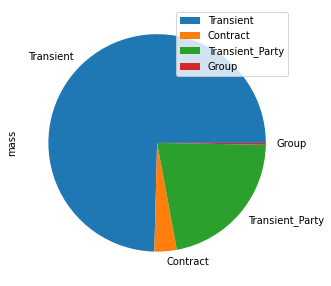

In [18]:
pie = pd.DataFrame({'mass': [len(Transient),  len(Contract), len(Transient_Party), len(Group)],
                   'radius': [len(Transient),  len(Contract), len(Transient_Party), len(Group)]},
                  index=['Transient', 'Contract', 'Transient_Party', 'Group'])
plot = pie.plot.pie(y='mass', figsize=(5, 5))

#### The answer:

In [19]:
x = dataset2['customer_type'].value_counts().idxmax()
print("Customer Type:",x)

Customer Type: Transient


### 2) How many reservations are from USA?
#### ( Here will we see the number of USA reservations )

#### Now we will use bar chart to see many reservations are from USA:

In [20]:
USA = dataset2.query('country  == "USA"')

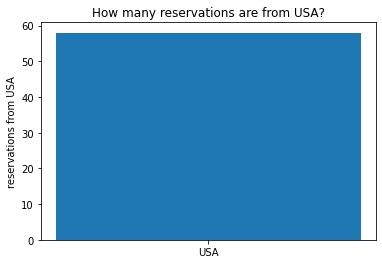

In [21]:
plt.bar("USA", len(USA))
plt.title('How many reservations are from USA?')
plt.ylabel('reservations from USA')
plt.show()

### We can see that the number of USA reservations is : 58

#### The answer:

In [22]:
print("Number of USA reservations:",len(USA))

Number of USA reservations: 58


### Research Q. 3) What year has the most reservations?
#### ( Here will we see the year that has the most reservations )

#### Now we will use pie chart to see the percentage of  each year:

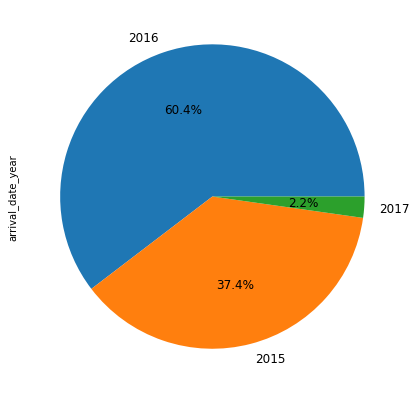

In [23]:
dataset2['arrival_date_year'].value_counts().plot.pie(figsize=(7,7), autopct='%1.1f%%', fontsize = 12)
plt.show()

### So, we can notice the percentage of 2016 is more than any year

#### The answer:

In [24]:
x = dataset2['arrival_date_year'].value_counts().idxmax()
print("The year has the most reservations:",x)

The year has the most reservations: 2016


<a id='Conclusions'></a>
## Conclusions:
#### 1-The data was able to answer all the questions accurately, which helps to get out of this data with results that help in understanding the characteristics of cars and the correlation of that with their prices.
#### 2-By using pie chart we see the type of each customer and we found Transient is the most type.
#### 3-We using bar chart to know how many reservations are from USA and the result was 58.
#### 4-We used pie chart to see the percentage of each year to know what year has the most reservations and we noticed the percentage of 2016 is more than any year.